# Students- Info
#### Salman Saeed Ijaz Ahmad Danial Sadiq

# FYP

###### This notebook is working on PPG signals
###### PPG signals are those signals which generate with 
###### circulation of blood in the fingertips
###### This will help to predict af = 0, non_af = 1
###### Thrugh fingertips sensor 

## Libaries

In [1]:
import pandas as pd
import os
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Pre Step

In [3]:
def Extract_5Min_Data(Folder, OutPut_Folder ,label = 0):
    for file in os.listdir(Folder):
        if file.endswith(".csv"):
            filePath = os.path.join(Folder, file)
            df = pd.read_csv(filePath)[:630]
            df["Class"] = label
            new_FileName = file
            output_Path = os.path.join(OutPut_Folder, new_FileName)
            df.to_csv(output_Path, index = False)
      

In [4]:
mimic_af_folder = "./data/raw_data/mimic_perform_af_csv/"
output_af_Folder = "./data/raw_data/OutPut_AF/"
Extract_5Min_Data(mimic_af_folder, output_af_Folder)

mimic_non_af_folder = "./data/raw_data/mimic_perform_non_af_csv/"
output_non_af_Folder = "./data/raw_data/OutPut_Non_AF/"
Extract_5Min_Data(mimic_non_af_folder, output_non_af_Folder, 1)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './mimic_perform_af_csv/'

In [50]:
def make_Dataset(folder1, folder2):
    
    folderList = [folder1, folder2]
    combine_df = pd.DataFrame()
    
    for folder in folderList:
        for file in os.listdir(folder):
            if file.endswith(".csv"):
                filePath = os.path.join(folder, file)
                df = pd.read_csv(filePath)
                combine_df = pd.concat([combine_df, df])
    
    combine_df = shuffle(combine_df)
    output_Path = os.path.join('./', "PPG_Signals.csv")
    combine_df.to_csv(output_Path, index = False)

In [51]:
make_Dataset(output_af_Folder, output_non_af_Folder)

## Load Dataset

In [29]:
df = pd.read_csv('PPG_Signals.csv')
df.head()

,Time,PPG,ECG,resp,Class
0,0.856,0.486275,0.740157,NaN,0
1,3.216,0.388235,0.039370,NaN,0
2,0.408,1.800587,0.309873,0.160308,0
3,3.968,0.627451,0.472441,NaN,0
4,0.592,0.472141,0.130859,0.432063,0


## Explore Dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    22050 non-null  float64
 1   PPG     21742 non-null  float64
 2   ECG     22050 non-null  float64
 3   resp    16380 non-null  float64
 4   Class   22050 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 861.5 KB


In [31]:
df.isnull().sum()

Time        0
PPG       308
ECG         0
resp     5670
Class       0
dtype: int64

In [32]:
df["PPG"].fillna(df["PPG"].mean(), inplace = True)
df["resp"].fillna(df["resp"].mean(), inplace = True)

df.drop("Time", axis = 1, inplace = True)

In [33]:
df.isnull().sum()

PPG      0
ECG      0
resp     0
Class    0
dtype: int64

In [34]:
df.head()

,PPG,ECG,resp,Class
0,0.486275,0.740157,0.221509,0
1,0.388235,0.039370,0.221509,0
2,1.800587,0.309873,0.160308,0
3,0.627451,0.472441,0.221509,0
4,0.472141,0.130859,0.432063,0


In [35]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPG     22050 non-null  float64
 1   ECG     22050 non-null  float64
 2   resp    22050 non-null  float64
 3   Class   22050 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 689.2 KB


In [37]:
df.head()

,PPG,ECG,resp,Class
0,0.486275,0.740157,0.221509,0
1,0.388235,0.039370,0.221509,0
2,1.800587,0.309873,0.160308,0
3,0.627451,0.472441,0.221509,0
4,0.472141,0.130859,0.432063,0


## Heatmap

           PPG       ECG      resp
PPG   1.000000 -0.089126 -0.045083
ECG  -0.089126  1.000000  0.021625
resp -0.045083  0.021625  1.000000


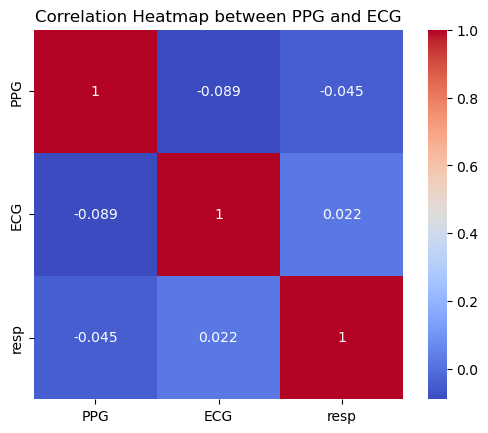

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['PPG', 'ECG', 'resp']].corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap between PPG and ECG')
plt.show()

## Split

In [39]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
22045    1
22046    0
22047    1
22048    1
22049    0
Name: Class, Length: 22050, dtype: int64

In [41]:
X

,PPG,ECG,resp
0,0.486275,0.740157,0.221509
1,0.388235,0.039370,0.221509
2,1.800587,0.309873,0.160308
3,0.627451,0.472441,0.221509
4,0.472141,0.130859,0.432063
...,...,...,...
22045,2.076246,0.079668,0.309064
22046,0.643137,0.803150,0.221509
22047,0.344086,0.390625,0.146628
22048,1.776149,0.495112,-0.067961


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.dtypes)
print(X_train.isnull().sum())

PPG     float64
ECG     float64
resp    float64
dtype: object
PPG     0
ECG     0
resp    0
dtype: int64


## Model

In [43]:
model_Acc_List = []
model_Name_List = ["RFClassifier", "KNClassifier", "ABClassifier", "SGDClassifier"]

## RandomForestClassifier

In [44]:
clf = RandomForestClassifier(random_state=50)
clf.fit(X_train, y_train)

predic = clf.predict(X_test)

acc = accuracy_score(predic, y_test)
model_Acc_List.append(acc)
print(f"Acc = {acc}")

report = classification_report(predic, y_test)
print(report)

Acc = 0.9013329668819569
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3952
           1       0.89      0.89      0.89      3325

    accuracy                           0.90      7277
   macro avg       0.90      0.90      0.90      7277
weighted avg       0.90      0.90      0.90      7277



## KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

predic = model.predict(X_test)
acc = accuracy_score(predic, y_test)
model_Acc_List.append(acc)
print("Acc : ", acc)

report = classification_report(predic, y_test)
print(report)

Acc :  0.8750858870413633
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3915
           1       0.87      0.86      0.86      3362

    accuracy                           0.88      7277
   macro avg       0.87      0.87      0.87      7277
weighted avg       0.88      0.88      0.88      7277



## AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

predic = model.predict(X_test)

acc = accuracy_score(predic, y_test)
model_Acc_List.append(acc)
print("Acc : ", acc)

report = classification_report(predic, y_test)
print(report)

Acc :  0.7358801703998901
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      3906
           1       0.72      0.71      0.71      3371

    accuracy                           0.74      7277
   macro avg       0.73      0.73      0.73      7277
weighted avg       0.74      0.74      0.74      7277



## SGDClassifier

In [47]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()

model.fit(X_train, y_train)
predic = model.predict(X_test)

acc = accuracy_score(predic, y_test)
model_Acc_List.append(acc)
print("Acc : ", acc)

report = classification_report(predic, y_test)
print(report)

Acc :  0.5439054555448674
              precision    recall  f1-score   support

           0       1.00      0.54      0.70      7277
           1       0.00      0.00      0.00         0

    accuracy                           0.54      7277
   macro avg       0.50      0.27      0.35      7277
weighted avg       1.00      0.54      0.70      7277



## Plotting

In [48]:
print(model_Acc_List)
print(model_Name_List)

[0.9013329668819569, 0.8750858870413633, 0.7358801703998901, 0.5439054555448674]
['RFClassifier', 'KNClassifier', 'ABClassifier', 'SGDClassifier']


In [49]:
import matplotlib.pyplot as plt

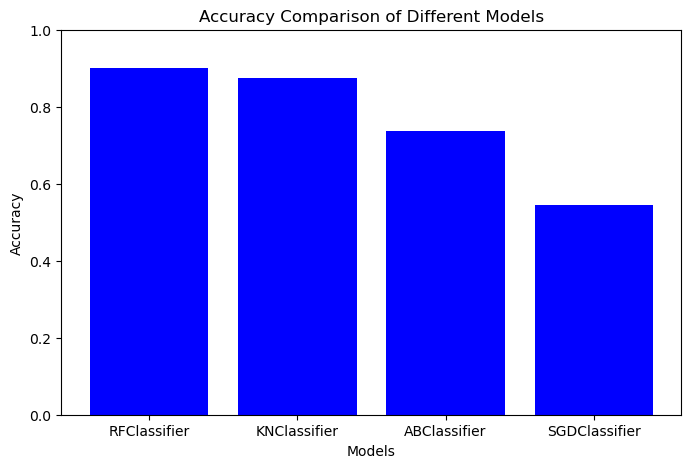

In [50]:
plt.figure(figsize=(8, 5))
plt.bar(model_Name_List, model_Acc_List, color='blue')
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

## Model pickle

In [51]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)

Thank you!